In [ ]:
#levels = 255, parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [3]:
image = train.iloc[0:5000, 1:]
label = train.iloc[0:5000, :1]

In [4]:
i = 1
img = image.iloc[i]
img = img.as_matrix()
img = img.reshape((28,28))

([array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([21.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  2.]),
  array([16.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  7.]),
  array([14.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1., 10.]),
  array([12.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0., 13.]),
  array([12.,  4.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  8.]),
  array([16.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  8.]),
  array([16.,  1.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  7.]),
  array([17.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  8.]),
  array([17.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  7.]),
  array([18.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  7.]),
  array([18.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  6.]),
  array([17.,  2.,  1., 

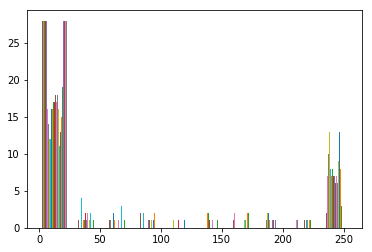

In [5]:
plt.hist(img)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}
svc = svm.SVC()
train_image, test_image, train_label, test_label = train_test_split(image, label, train_size = 0.8, random_state = 0)
clf = GridSearchCV(svc, parameters)
clf.fit(train_image, train_label)
clf.score(test_image, test_label)

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was e

0.929

In [9]:
results = clf.predict(test[0:5000])

In [10]:
results

array([2, 0, 9, ..., 1, 7, 3], dtype=int64)

In [12]:
df = pd.DataFrame(results)
df.index.name = 'ImageId'
df.index += 1
df.columns = ['Label']
df.to_csv('results1.csv', header = True)

In [13]:
GridSearchCV.get_params(clf)

{'cv': None,
 'error_score': 'raise',
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}